<h2>Hands-on 2: kNN Notebook (Tutorial)</h2>



---



<h3>1. Fundamentos de la técnica.</h3>

**¿Qué es?**

kNN es un algoritmo de aprendizaje automático supervisado que generalmente se usa para la clasificación, pero también se puede usar para tareas de regresión.

**¿Cómo funciona?**

Funciona encontrando los "k" puntos de datos más cercanos (vecinos) a una entrada dada y hace predicciones basadas en la clase mayoritaria (para la clasificación) o el valor promedio (para la regresión). Dado que KNN no hace suposiciones sobre la distribución de datos subyacente, lo convierte en un método de aprendizaje no paramétrico y basado en instancias.

**¿Qúe es k?**

En el algoritmo, k es solo un número que le dice al algoritmo cuántos puntos cercanos o vecinos debe mirar cuando toma una decisión.
Elegir el k correcto es importante para obtener buenos resultados. Se recomienda elegir un número impar para evitar empates a la hora de decidir.



---



<h3>2. Modelo matemático.</h3>


Lo más importante del modelo kNN es la función de distancia, que mide la similitud entre el punto de consulta y los puntos del conjunto de datos.
La métrica de distancia más común es la Distancia Euclidiana.

**2.1 Métrica de Distancia (Distancia Euclidiana)**

Para dos puntos de datos $p$ y $q$ en un espacio $n$-dimensional (donde $n$ es el número de características), la distancia Euclidiana se calcula como:

$$d(p, q) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}$$

**2.2 Regla de Clasificación**

Calcular la distancia $d(p, q)$ del nuevo punto de consulta ($q$) a todos los puntos del entrenamiento ($p$).Seleccionar los $k$ puntos de entrenamiento más cercanos.Asignar al nuevo punto de consulta la clase más frecuente (por votación mayoritaria) entre esos $k$ vecinos.

$$\text{Clase}(q) = \underset{c \in \text{Clases}}{\operatorname{argmax}} \left( \sum_{p_i \in \text{k-Vecinos}(q)} I(\text{Clase}(p_i) = c) \right)$$

Donde $I(\cdot)$ es la función indicadora, que es 1 si la condición es verdadera y 0 si es falsa.




---



<h3>3. Descripción de las librerías.</h3>

Para la implementación de kNN en Python se realizará con la ayuda de las siguientes librerías:

    sklearn.neighbors.KNeighborsClassifier
Contiene la implementación del algoritmo k-Nearest Neighbors para tareas de clasificación.

    sklearn.model_selection.train_test_split
Para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

    sklearn.metrics.confusion_matrix
Para calcular la Matriz de Confusión.

    sklearn.metrics.accuracy_score
Para calcular la Precisión (Accuracy) del modelo.

    sklearn.datasets.load_iris
Para cargar el dataset de flores Iris.

    pandas
Para la manipulación y visualización tabular de datos.

    seaborn / matplotlib
Para el análisis estadístico y la visualización de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



---



<h3>4. Pipeline.</h3>

    4.1 Preprocessing

Como primer paso cargaremos el dataset de "Iris", posteriormente con el método **describe()** podemos ver y analizar las estadísticas básicas del dataset. Así mismo podemos comparar y visualizar la separación de las clases con ayuda de un diagrama de dispersión, podemos observar que dependiendo de las carácteristicas tendremos más o menos separación.






--- Estadísticas ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  




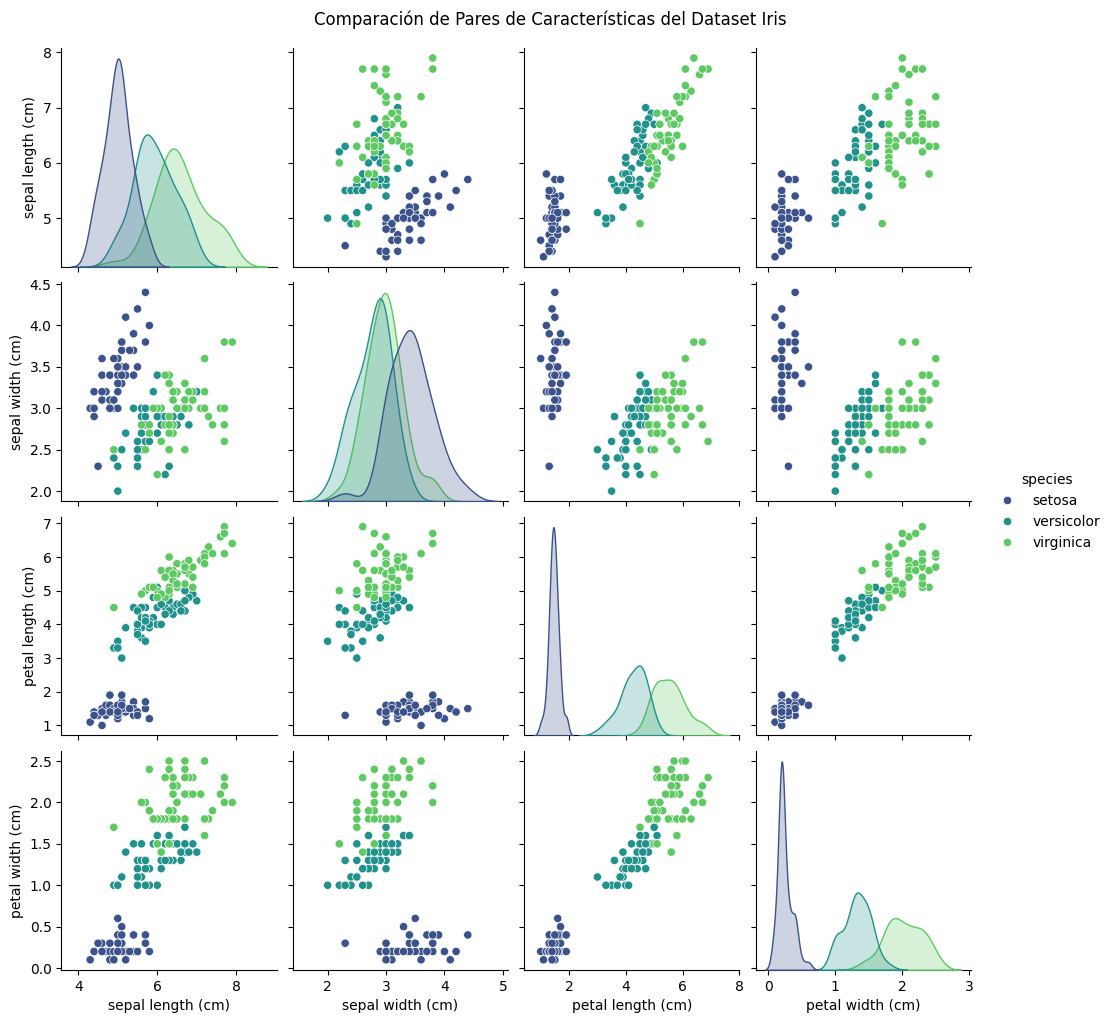

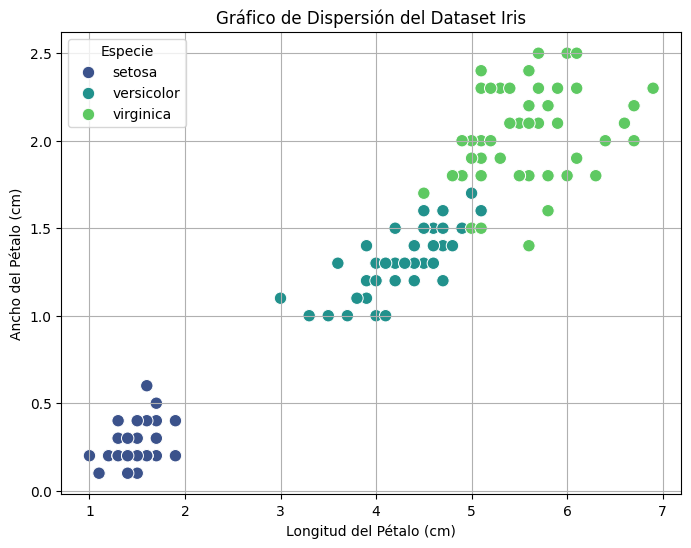

In [5]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convertir a DataFrame
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['species'] = [target_names[i] for i in y]

print("--- Estadísticas ---")
print(df_iris.describe())
print("\n")

# Gráficos de Dispersión comparativos: Pairs Plot
sns.pairplot(df_iris, hue="species", palette="viridis")
plt.suptitle("Comparación de Pares de Características del Dataset Iris", y=1.02)
plt.show()


# Gráficos de Dispersión
print("\n")
plt.figure(figsize=(8, 6))

sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df_iris, palette='viridis', s=80)
plt.title('Gráfico de Dispersión del Dataset Iris')
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.legend(title='Especie')
plt.grid(True)
plt.show()




En la última gáfica podemos ver una mejor separación de las especies.

    4.2 Feature Engineering

En este ejemplo contamos con cuatro carácteristicas (sepal length, sepal width, petal length, petal width). En este caso, vamos a emplear las 4 variables para el modelo.

En cuanto a kNN, vamos a elegir un k = 5, como valor inicial, ya que es impar y nos evita problemas de desmpate.

In [6]:
# Separar datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo kNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Almacenar los datos de entrenamiento
knn.fit(X_train, y_train)

print(f"Modelo kNN entrenado con k = {k}")

Modelo kNN entrenado con k = 5


    4.3 Prediction


In [9]:
def classify_new_pattern(model, new_pattern, feature_names, target_names):
    pattern_input = np.array(new_pattern).reshape(1, -1)

    # Realizar la predicción
    prediction = model.predict(pattern_input)[0]
    predicted_species = target_names[prediction]

    print("\n--- Clasificación de un Nuevo Patrón ---")
    print(f"Características (Sepal L, Sepal W, Petal L, Petal W): {new_pattern}")
    print(f"Clase Predicha: {predicted_species}")


# Ejemplo de patrón para clasificar
ejemplo_patron = [6.3, 3.3, 6.0, 2.5]

classify_new_pattern(knn, ejemplo_patron, feature_names, target_names)


--- Clasificación de un Nuevo Patrón ---
Características (Sepal L, Sepal W, Petal L, Petal W): [6.3, 3.3, 6.0, 2.5]
Clase Predicha: virginica


    4.4 Model Evaluation


--- Evaluación del Modelo kNN --



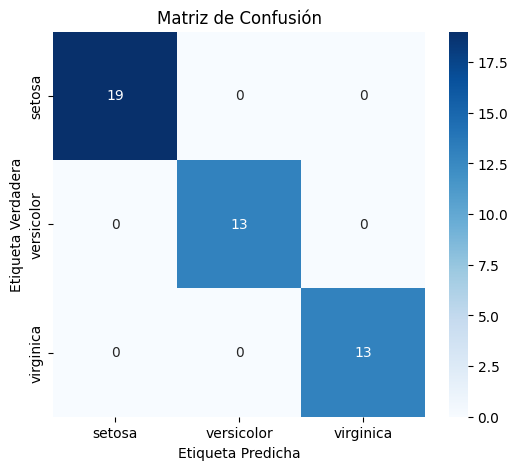


Precisión: 1.0000 (100.00%)


In [12]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

print("\n--- Evaluación del Modelo kNN --\n")

# 1. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión: {accuracy:.4f} ({accuracy*100:.2f}%)")


En la matriz de confusión los valores fuera de la diagonal principal son incorrectos, en este caso podemos apreciar que todas las predicciones fueron correctamente clasificadas en su especie. Así mismo, lo podemos corroborar con el resultado obtenido de la precisión, que resultó ser 100%.
En concusión, podemos decir que el algoritmo de kNN funcionó correctamente.



---



<h3>5. Referecias bibliográficas</h3>

GeeksforGeeks. (23 Aug, 2025). K-Nearest Neighbor(KNN) Algorithm. https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/


Scikit-learn. KNeighborsClassifier — scikit-learn 1.7.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html